In [1]:
!pip install easyocr
!pip install -q super-gradients==3.2.1
!pip install filterpy==1.1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.5/684.5 kB 27.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.6/408.6 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 35.9 MB/s 

In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from google.colab.patches import cv2_imshow
import imutils
import easyocr
from google.colab import drive

import torch
from super_gradients.training import models
import numpy as np
import math
from numpy import random


#from base64 import b64encode

The console stream is logged into /root/sg_logs/console.log


[2023-12-15 00:01:02] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2023-12-15 00:01:02] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-12-15 00:01:03] INFO - utils.py - NumExpr defaulting to 2 threads.
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
[2023-12-15 00:01:19] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-12-15 00:01:19] WARNING - export.py - Failed to import pytorch_quantization
[2023-12-15 00:01:19] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2023-12-15 00:01:19] WARNING - env_sanity_check.py - Failed to verify installed packages: boto3 required but not found
[2023-12-15 00:01:19] WARNING - env_sanity_check.py - Failed to verify installed packages: deprecated required but not found
[20

In [3]:
drive.mount('/content/drive')

In [45]:
def charger_images(chemin_dossier):
    images = []
    filenames = sorted(os.listdir(chemin_dossier))
    for nom_fichier in filenames:
        chemin_image = os.path.join(chemin_dossier, nom_fichier)
        image = cv2.imread(chemin_image)
        if image is not None:
            images.append(image)
    return images

In [46]:

def redimensionner_images(images, nouvelle_taille):
    images2 = []
    for image in images:
        image_redimensionnee = cv2.resize(image, nouvelle_taille)
        images2.append(image_redimensionnee)
    return images2

In [47]:
def normaliser_images(images):
    images2 = []
    for image in images:
        image_normalisee = image / 255.0
        images2.append(image_normalisee)
    return images2

In [48]:
chemin_dossier = "drive/MyDrive/chway/"
taille = (224, 224)

In [49]:
#from tensorflow.keras import backend as K
#from tensorflow.keras.models import load_model
#from tensorflow.keras.layers import Input

In [50]:
"""
img = cv2.imread(chemin_dossier+"/car.jpg")
ocr_text = f"{result[0][-2]} - {(result[0][-1]*100):.2f}%"
text_size, _ = cv2.getTextSize(ocr_text, cv2.FONT_HERSHEY_SIMPLEX, 2, 1)
cv2.rectangle(img, (x1, y1 - text_size[1] - 10), (x1 + text_size[0] + 10, y1), (255, 255, 255), -1)
cv2.putText(img, ocr_text, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 0), 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
"""

'\nimg = cv2.imread(chemin_dossier+"/car.jpg")\nocr_text = f"{result[0][-2]} - {(result[0][-1]*100):.2f}%"\ntext_size, _ = cv2.getTextSize(ocr_text, cv2.FONT_HERSHEY_SIMPLEX, 2, 1)\ncv2.rectangle(img, (x1, y1 - text_size[1] - 10), (x1 + text_size[0] + 10, y1), (255, 255, 255), -1)\ncv2.putText(img, ocr_text, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 0), 3)\nplt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))\n'

In [51]:
def load_model(nom):
    device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
    model = models.get(nom, pretrained_weights="coco").to(device)
    return model

In [52]:
yolo = 'yolo_nas_s'
model = load_model(yolo)

[2023-12-15 00:17:25] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2023-12-15 00:17:25] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_s


In [53]:
classNames = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella","handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat","baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup","fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli","carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa", "pottedplant", "bed","diningtable", "toilet", "tvmonitor", "laptop", "mouse", "remote", "keyboard", "cell phone","microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors","teddy bear", "hair drier", "toothbrush" ]

koussay :

box y5arij el matricule bil contour

box2 nafs el 5idma juste el edged yi7sibha b fonction o5ra

box3 nafs el 5idma amma yi7sib el contour el s7i7 b tari9a o5ra

box4 ma8ir contour jimla lguit fazet el haarcascade 5oudhou 3liya fikra

7asb ma jaribt box4 a7sin wa7da pour le moment

In [54]:
def box(image):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
  edged = cv2.Canny(bfilter, 30, 200)

  keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  contours = imutils.grab_contours(keypoints)
  contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
  location = None
  for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

  if location is None:
    return []
  else:
    mask = np.zeros(gray.shape, np.uint8)
    new_image = cv2.drawContours(mask, [location], 0,255, -1)
    new_image = cv2.bitwise_and(image, image, mask=mask)

    (x,y) = np.where(mask==255)
    (x1, y1) = (np.min(x), np.min(y))
    (x2, y2) = (np.max(x), np.max(y))

    cropped_image = gray[x1:x2+1, y1:y2+1]
    reader = easyocr.Reader(['en'])
    result = reader.readtext(cropped_image)

  return result

In [55]:
# pipeline de test ocr complet

"""
  image=cv2.imread(chemin_dossier+"car.jpg")
  cv2_imshow(image)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  cv2_imshow(gray)
  bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
  cv2_imshow(bfilter)
  _, edged = cv2.threshold(gray,64,255,cv2.THRESH_BINARY_INV)
  cv2_imshow(edged)
  keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  contours = imutils.grab_contours(keypoints)

  contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
  location = None
  for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
  mask = np.zeros(gray.shape, np.uint8)

  new_image = cv2.drawContours(mask, [location], 0,255, -1)


  new_image = cv2.bitwise_and(image, image, mask=mask)

  (x,y) = np.where(mask==255)
  (x1, y1) = (np.min(x), np.min(y))
  (x2, y2) = (np.max(x), np.max(y))

  cropped_image = gray[x1:x2+1, y1:y2+1]
  cv2_imshow(cropped_image)
  reader = easyocr.Reader(['en'])
  result = reader.readtext(cropped_image)
  print(result)
  """

'\n  image=cv2.imread(chemin_dossier+"car.jpg")\n  cv2_imshow(image)\n  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)\n  cv2_imshow(gray)\n  bfilter = cv2.bilateralFilter(gray, 11, 17, 17)\n  cv2_imshow(bfilter)\n  _, edged = cv2.threshold(gray,64,255,cv2.THRESH_BINARY_INV)\n  cv2_imshow(edged)\n  keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)\n\n  contours = imutils.grab_contours(keypoints)\n\n  contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]\n  location = None\n  for contour in contours:\n    approx = cv2.approxPolyDP(contour, 10, True)\n    if len(approx) == 4:\n        location = approx\n        break\n  mask = np.zeros(gray.shape, np.uint8)\n\n  new_image = cv2.drawContours(mask, [location], 0,255, -1)\n\n\n  new_image = cv2.bitwise_and(image, image, mask=mask)\n\n  (x,y) = np.where(mask==255)\n  (x1, y1) = (np.min(x), np.min(y))\n  (x2, y2) = (np.max(x), np.max(y))\n\n  cropped_image = gray[x1:x2+1, y1:y2+1]\n  cv2_imshow(c

In [56]:
#print(box4(image))

In [57]:
def box2(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    bfilter = cv2.bilateralFilter(gray, 15, 75, 75)
    edged = cv2.adaptiveThreshold(bfilter, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(keypoints)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

    location = None

    for contour in contours:
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        if len(approx) == 4:
            location = approx
            break

    if location is None:
        return []
    else:
        mask = np.zeros(gray.shape, np.uint8)
        new_image = cv2.drawContours(mask, [location], 0, 255, -1)
        new_image = cv2.bitwise_and(image, image, mask=mask)

        (x, y) = np.where(mask == 255)
        (x1, y1) = (np.min(x), np.min(y))
        (x2, y2) = (np.max(x), np.max(y))

        cropped_image = gray[x1:x2 + 1, y1:y2 + 1]
        reader = easyocr.Reader(['en'])
        result = reader.readtext(cropped_image)

    return result

In [58]:
def box3(image):
    height, width, _ = image.shape
    cropped_img = image[height//3:, :]
    gray = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)
    #bfilter = cv2.bilateralFilter(gray, 15, 75, 75)

    _, edged = cv2.threshold(gray,64,255,cv2.THRESH_BINARY_INV)
    keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(keypoints)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

    location = None

    for contour in contours:
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        if len(approx) == 4:
            location = approx
            break

    if location is None:
        return []
    else:
        mask = np.zeros(gray.shape, np.uint8)
        new_image = cv2.drawContours(mask, [location], 0, 255, -1)
        new_image = cv2.bitwise_and(cropped_img, cropped_img, mask=mask)

        (x, y) = np.where(mask == 255)
        (x1, y1) = (np.min(x), np.min(y))
        (x2, y2) = (np.max(x), np.max(y))

        cropped = gray[x1:x2 + 1, y1:y2 + 1]
        _, cropped_image = cv2.threshold(cropped,64,255,cv2.THRESH_BINARY_INV)
        reader = easyocr.Reader(['en'])
        result = reader.readtext(cropped_image)

    return result

In [59]:
reader = easyocr.Reader(['en'])
def box4(image):
    if image is None or image.size == 0:
      return []
    car_cascade = cv2.CascadeClassifier(chemin_dossier+'haarcascade_russian_plate_number.xml')

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #cv2_imshow(gray_image)
    cars = car_cascade.detectMultiScale(gray_image, 1.1, 1)
    resultats2 =[]
    for (x, y, w, h) in cars:
        roi = image[y:y+h, x:x+w]

        #cv2_imshow(roi)
        _, edged = cv2.threshold(roi,64,255,cv2.THRESH_BINARY_INV)

        resultats = reader.readtext(edged)

        if resultats:
          resultats2=resultats
          break


    return resultats2


[2023-12-15 00:17:30] WARNING - easyocr.py - Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [60]:
def yolo_predire(img):
  result=list(model.predict(img, conf=0.4,fuse_model=False))[0]
  bbox_xyxys = result.prediction.bboxes_xyxy.tolist()

  #confidences = result.prediction.confidence
  labels = result.prediction.labels.tolist()
  images=[]
  positions=[]
  for (bbox_xyxy, cls) in zip(bbox_xyxys, labels):
      #if classNames[int(cls)] == 'car':
      if classNames[int(cls)] in ['car', 'truck', 'bus', 'motorbike']:
        bbox = np.array(bbox_xyxy)
        x1, y1, x2, y2 = bbox[0], bbox[1], bbox[2], bbox[3]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        #classname = int(cls)
        #class_name = classNames[classname]
        #conf = math.ceil((confidence * 100)) / 100
        #label = f'{class_name}{conf}'

        #print("voiture :", x1, y1, x2, y2)

        cropped_image = img[y1:y2, x1:x2]
        images.append(cropped_image)
        positions.append((x1, y1, x2, y2))

  return images,positions


In [61]:
def yolo_predire(img):
  result=list(model.predict(img, conf=0.4,fuse_model=False))[0]
  bbox_xyxys = result.prediction.bboxes_xyxy.tolist()

  #confidences = result.prediction.confidence
  labels = result.prediction.labels.tolist()
  #images=[]
  positions=[]
  for (bbox_xyxy, cls) in zip(bbox_xyxys, labels):
      #if classNames[int(cls)] == 'car':
      if classNames[int(cls)] in ['car', 'truck', 'bus', 'motorbike']:
        bbox = np.array(bbox_xyxy)
        x1, y1, x2, y2 = bbox[0], bbox[1], bbox[2], bbox[3]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        #classname = int(cls)
        #class_name = classNames[classname]
        #conf = math.ceil((confidence * 100)) / 100
        #label = f'{class_name}{conf}'

        #print("voiture :", x1, y1, x2, y2)
        #cropped_image = img[y1:y2, x1:x2]
        #images.append(cropped_image)
        positions.append((x1, y1, x2, y2))

  return positions


In [62]:
def extract_frames(chemin_video):
    cap = cv2.VideoCapture(chemin_video)

    if not cap.isOpened():
        print("Erreur ouverture")
        return None

    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)
    cap.release()

    return frames

In [63]:
def extract_frames_local(chemin_video):
    cap = cv2.VideoCapture(chemin_video)

    if not cap.isOpened():
        print("Erreur ouverture")
        return None

    output_folder = 'images'
    os.makedirs(output_folder, exist_ok=True)
    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame_filename = os.path.join(output_folder, f'frame_{frame_count:04d}.jpg')
        cv2.imwrite(frame_filename, frame)
        frame_count += 1
    cap.release()

In [64]:
def extract_frames_limite(chemin_video,limite):
    cap = cv2.VideoCapture(chemin_video)

    if not cap.isOpened():
        print("Erreur ouverture")
        return None
    i=0
    frames = []
    while True:
        ret, frame = cap.read()
        i+=1
        if not ret:
            break
        if i==limite:
          break
        frames.append(frame)
    cap.release()

    return frames

In [65]:
"""
chemin_video = chemin_dossier+'autoroute_cam.mp4'

video_frames = extract_frames_limite(chemin_video,100)
#video_frames = extract_frames(chemin_video)
#extract_frames_local(chemin_video)

if video_frames is not None:
    print(f"Nombre de frames : {len(video_frames)}")
else:
    print("Erreur")
"""

'\nchemin_video = chemin_dossier+\'autoroute_cam.mp4\'\n\nvideo_frames = extract_frames_limite(chemin_video,100)\n#video_frames = extract_frames(chemin_video)\n#extract_frames_local(chemin_video)\n\nif video_frames is not None:\n    print(f"Nombre de frames : {len(video_frames)}")\nelse:\n    print("Erreur")\n'

In [66]:
"""
cv2_imshow(video_frames[5])
images,cr=yolo_predire(video_frames[5])
i=0
while i < len(images):
  cv2_imshow(images[i])
  i+=1

print i
"""

'\ncv2_imshow(video_frames[5])\nimages,cr=yolo_predire(video_frames[5])\ni=0\nwhile i < len(images):\n  cv2_imshow(images[i])\n  i+=1\n\nprint i\n'

In [67]:

"""
#images2=redimensionner_images(images,taille)
test = images[2]
plt.imshow(test)
resultocr1 = box(test)
print("box1")
print(resultocr1)
resultocr2 = box2(test)
print("box2")
print(resultocr2)
resultocr3 = accurate(test)
print("accurate")
print(resultocr3)

"""

'\n#images2=redimensionner_images(images,taille)\ntest = images[2]\nplt.imshow(test)\nresultocr1 = box(test)\nprint("box1")\nprint(resultocr1)\nresultocr2 = box2(test)\nprint("box2")\nprint(resultocr2)\nresultocr3 = accurate(test)\nprint("accurate")\nprint(resultocr3)\n\n'

In [68]:
def create_video(images, output_path='output_video.mp4', fps=30):
  height, width, _ = images[0].shape

  fourcc = cv2.VideoWriter_fourcc(*'mp4v')
  video_writer = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

  for img in images:
    video_writer.write(img)


  video_writer.release()

  #image_array = []
  output_path = 'output_video.mp4'
  fps = 30

In [70]:
"""
def detecter_voitures_9bal(image,frame_count):
    car_images, car_coordinates = yolo_predire(image)
    for i, (x1, y1, x2, y2) in enumerate(car_coordinates):
        #result=[]

        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        car_roi = image[y1:y2, x1:x2]

        if i % 10 ==0:
          result = box4(car_roi)


        if result:
          print(result)
          ocr_text = f"{result[0][-2]} - {(result[0][-1]*100):.2f}%"
          text_size, _ = cv2.getTextSize(ocr_text, cv2.FONT_HERSHEY_SIMPLEX, 2, 1)
          cv2.rectangle(image, (x1, y1 - text_size[1] - 10), (x1 + text_size[0] + 10, y1), (255, 255, 255), -1)
          cv2.putText(image, ocr_text, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 0), 3)

    return image
    """

'\ndef detecter_voitures_9bal(image,frame_count):\n    car_images, car_coordinates = yolo_predire(image)\n    for i, (x1, y1, x2, y2) in enumerate(car_coordinates):\n        #result=[]\n\n        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)\n        car_roi = image[y1:y2, x1:x2]\n\n        if i % 10 ==0:\n          result = box4(car_roi)\n\n\n        if result:\n          print(result)\n          ocr_text = f"{result[0][-2]} - {(result[0][-1]*100):.2f}%"\n          text_size, _ = cv2.getTextSize(ocr_text, cv2.FONT_HERSHEY_SIMPLEX, 2, 1)\n          cv2.rectangle(image, (x1, y1 - text_size[1] - 10), (x1 + text_size[0] + 10, y1), (255, 255, 255), -1)\n          cv2.putText(image, ocr_text, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 0), 3)\n\n    return image\n    '

In [75]:
def detecter_voitures(image,frame_count):
    car_coordinates = yolo_predire(image)
    for i, (x1, y1, x2, y2) in enumerate(car_coordinates):
        result=[]

        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        car_roi = image[y1:y2, x1:x2]

        if i % 10 ==0:
          result = box4(car_roi)


        if result:
          print(result)
          ocr_text = f"{result[0][-2]} - {(result[0][-1]*100):.2f}%"
          text_size, _ = cv2.getTextSize(ocr_text, cv2.FONT_HERSHEY_SIMPLEX, 2, 1)
          cv2.rectangle(image, (x1, y1 - text_size[1] - 10), (x1 + text_size[0] + 10, y1), (255, 255, 255), -1)
          cv2.putText(image, ocr_text, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 0), 3)
          filename = f"car_{frame_count}_{i}.jpg"
          os.makedirs("matricules", exist_ok=True)
          cv2.imwrite(os.path.join("matricules", filename), car_roi)

    return image

/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


[([[38, 16], [140, 16], [140, 64], [38, 64]], 'LIVXL', 0.9737108289877772)]


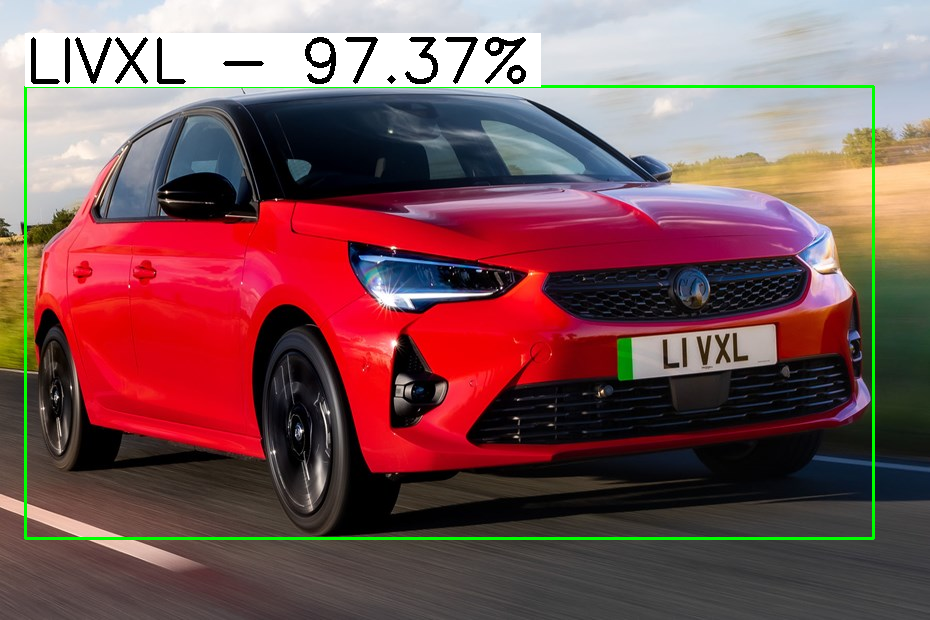

In [44]:
cv2_imshow(detecter_voitures(cv2.imread(chemin_dossier+"li.jpg"),10))

In [ ]:

"""
tracked_cars ={}

def detecter_voitures(image, frame_count):
    global tracked_cars

    car_images, car_coordinates = yolo_predire(image)
    for i, (x1, y1, x2, y2) in enumerate(car_coordinates):
        car_id = f"car_{i}"

        if car_id not in tracked_cars:
            bbox = (x1, y1, x2 - x1, y2 - y1)
            tracked_cars[car_id] = {"tracker": cv2.TrackerKCF_create(), "bbox": bbox, "last_ocr_result": None, "frames_since_last_ocr": 0}
            tracked_cars[car_id]["tracker"].init(image, bbox)
        else:
            ok, new_bbox = tracked_cars[car_id]["tracker"].update(image)
            if ok:
                x1, y1, w, h = map(int, new_bbox)
                x2, y2 = x1 + w, y1 + h
                tracked_cars[car_id]["bbox"] = (x1, y1, x2 - x1, y2 - y1)
            else:
                # If tracking fails, reset the tracker
                bbox = (x1, y1, x2 - x1, y2 - y1)
                tracked_cars[car_id]["tracker"].init(image, bbox)

        # Perform OCR every 10 frames
        if tracked_cars[car_id]["frames_since_last_ocr"] == 10:
            car_roi = image[y1:y2, x1:x2]
            ocr_result = box4(car_roi)

            if ocr_result:
                tracked_cars[car_id]["last_ocr_result"] = {"text": ocr_result[0][-2], "confidence": ocr_result[0][-1]}
                tracked_cars[car_id]["frames_since_last_ocr"] = 0

        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Display the last OCR result
        if tracked_cars[car_id]["last_ocr_result"]:
            ocr_text = f"{tracked_cars[car_id]['last_ocr_result']['text']} - {tracked_cars[car_id]['last_ocr_result']['confidence']:.2f}%"
            text_size, _ = cv2.getTextSize(ocr_text, cv2.FONT_HERSHEY_SIMPLEX, 2, 1)
            cv2.rectangle(image, (x1, y1 - text_size[1] - 10), (x1 + text_size[0] + 10, y1), (255, 255, 255), -1)
            cv2.putText(image, ocr_text, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 0), 3)

        # Update tracking information
        tracked_cars[car_id]["frames_since_last_ocr"] += 1

    return image
"""

In [ ]:
#!pip install deep-sort-realtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 19.3 MB/s eta 0:00:00


In [ ]:

"""
from deep_sort_realtime.deepsort_tracker import DeepSort

# Initialize DEEPSORT tracker
tracker = DeepSort(max_age=5)

# Initialize dictionary to keep track of cars and their OCR update frames
tracked_cars = {}

def detecter_voitures(image):
    global tracked_cars

    # Detect cars using YOLOv4
    car_images, car_coordinates = yolo_predire(image)

    # Update tracker with current detections
    tracker.update(car_coordinates, car_images)

    # Loop through tracked cars
    for track in tracker.tracks:
        # Get car ID and bounding box coordinates
        car_id = track.track_id
        x1, y1, x2, y2 = track.to_tlbr().astype(int)

        # Check if car has been tracked before
        if car_id not in tracked_cars:
            # Initialize car's OCR update frame count
            tracked_cars[car_id] = {"frames_since_last_ocr": 0}

        # Increment car's OCR update frame count
        tracked_cars[car_id]["frames_since_last_ocr"] += 1

        # Check if it's time to update the car's OCR result
        if tracked_cars[car_id]["frames_since_last_ocr"] == 60:
            # Extract car's region of interest (ROI) and perform OCR on it
            car_roi = image[y1:y2, x1:x2]
            ocr_result = box4(car_roi)

            # Reset car's OCR update frame count
            tracked_cars[car_id]["frames_since_last_ocr"] = 0

            # Display OCR result above car's bounding box
            if ocr_result:
                ocr_text = f"{ocr_result[0][-2]} - {(ocr_result[0][-1]*100):.2f}%"
                text_size, _ = cv2.getTextSize(ocr_text, cv2.FONT_HERSHEY_SIMPLEX, 2, 1)
                cv2.rectangle(image, (x1, y1 - text_size[1] - 10), (x1 + text_size[0] + 10, y1), (255, 255, 255), -1)
                cv2.putText(image, ocr_text, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 0), 3)

        # Draw bounding box around car
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    return image
    """

'\nfrom deep_sort_realtime.deepsort_tracker import DeepSort\n\n# Initialize DEEPSORT tracker\ntracker = DeepSort(max_age=5)\n\n# Initialize dictionary to keep track of cars and their OCR update frames\ntracked_cars = {}\n\ndef detect_and_draw_cars(image):\n    global tracked_cars\n    \n    # Detect cars using YOLOv4\n    car_images, car_coordinates = yolo_predire(image)\n    \n    # Update tracker with current detections\n    tracker.update(car_coordinates, car_images)\n    \n    # Loop through tracked cars\n    for track in tracker.tracks:\n        # Get car ID and bounding box coordinates\n        car_id = track.track_id\n        x1, y1, x2, y2 = track.to_tlbr().astype(int)\n        \n        # Check if car has been tracked before\n        if car_id not in tracked_cars:\n            # Initialize car\'s OCR update frame count\n            tracked_cars[car_id] = {"frames_since_last_ocr": 0}\n        \n        # Increment car\'s OCR update frame count\n        tracked_cars[car_id]["fra

In [ ]:
def detecter_voitures2(image):
    car_images, car_coordinates = yolo_predire(image)

    for i, (x1, y1, x2, y2) in enumerate(car_coordinates):
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    return image

In [ ]:
#output_image = detecter_voitures(cv2.imread(chemin_dossier+'car.jpg'),10)
#box4(video_frames[90])

#plt.imshow(detecter_voitures2(video_frames[90]))

In [72]:
def process_images(image_array):
    images2 = []
    i=0
    for image in image_array:
        image_rectangle = detecter_voitures(image,i)
        #image_rectangle = detecter_voitures(image)
        images2.append(image_rectangle)
        i+=1
        print (i)
    return images2

In [71]:
def process_images_local(folder_path):
    os.makedirs('images2', exist_ok=True)

    images = sorted([f for f in os.listdir('images2') if f.endswith(('.jpg', '.png'))])
    for i, image_fichier in enumerate(images):
        print(i)
        image_path = os.path.join('images2', image_fichier)
        image = cv2.imread(image_path)

        # Process the image using the detect_and_draw_cars function
        image_rectangle = detecter_voitures(image,i)

        # Save the processed image to the output folder
        frame_filename = os.path.join(output_folder, f'frame_{i:04d}.jpg')
        cv2.imwrite(frame_filename, image_rectangle)

In [33]:
#del video_frames
chemin_video = chemin_dossier+'autoroute_cam.mp4'

video_frames = extract_frames_limite(chemin_video,50)
#video_frames = extract_frames(chemin_video)
#extract_frames_local(chemin_video)
'''
if video_frames is not None:
    print(f"Nombre de frames : {len(video_frames)}")
else:
    print("Erreur")

'''

'\nif video_frames is not None:\n    print(f"Nombre de frames : {len(video_frames)}")\nelse:\n    print("Erreur")\n\n'

In [ ]:
#video_frames = video_frames[::2]
#len(video_frames)

In [ ]:

#output_image_array = process_images(video_frames)
process_images_local("images")

In [ ]:
#output_image_array = charger_images("images2")

In [ ]:
"""
#cv2_imshow(cropped_image)
#plt.imshow(video_frames[200])
i=0
while i < len(output_image_array):
  cv2_imshow(output_image_array[i])
  i+=1
"""


In [ ]:
#create_video(output_image_array,fps=10)

In [77]:
def create_video_local(folder_path, output_path='output_video.mp4', fps=30):
    image_files = [f for f in sorted(os.listdir(folder_path)) if f.endswith(('.png', '.jpg', '.jpeg'))]

    if not image_files:
        print("No image files found in the folder.")
        return

    first_image_path = os.path.join(folder_path, image_files[0])
    first_image = cv2.imread(first_image_path)
    height, width, _ = first_image.shape

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    video_writer = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        img = cv2.imread(image_path)
        video_writer.write(img)

    video_writer.release()

In [ ]:
create_video_local("images2",fps=10)

In [ ]:
video_frames = []

In [ ]:
%rm ./images/frame_2*

rm: cannot remove './images/frame_2*': No such file or directory


In [ ]:
%rm ./images2/*